# 6.4 Задание на проверку гипотезы о законе распределения

In [13]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

Правда ли, что время ожидания автобуса Василием подчиняется равномерному на [9, 15] закону распределения.

In [ ]:
a = np.array([13.0, 9.8, 10.2, 12.9, 10.4])
alpha = 0.01
Dn1, _ = sps.kstest(a, lambda x: sps.uniform.cdf(x, loc=9., scale=6.))
Dn1*np.sqrt(5), sps.kstwobign.ppf(alpha, loc=9, scale=6)

По предложенной выборке  агрегированных рейтингов  хлопьев на завтрак, выдвиньте и проверьте гипотезу о законе распределения рейтингов.

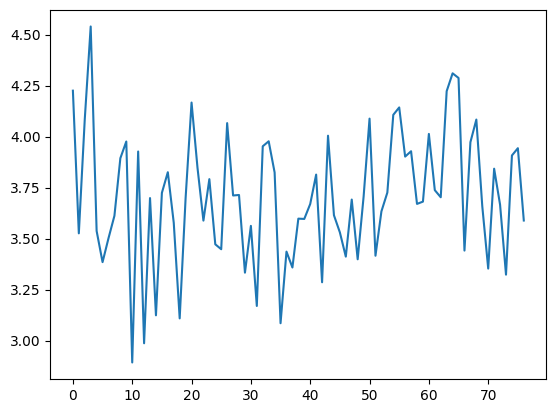

In [32]:
with open(r"C:\Users\alexander\OneDrive\Рабочий стол\tcereals.txt", "r") as f:
    text = f.readlines()[1:]
X = []
for i in text:
    x = float(i.replace("\n", "").split()[1])
    X.append(x)
lnX = np.array(list(map(np.log, X)))
plt.plot(lnX)
plt.show()

In [37]:
alpha = 0.03
a = lnX.copy()
n = len(a)
x = sum(a)/n
std = np.std(a)
mu = lambda p: sum([(xi - x)**p for xi in a])/n
Sk = mu(3)/(std**3)
K = mu(4)/(std**4) - 3
JB = n/6*(Sk**2 + K**2/4)
sps.jarque_bera(a)
# JB

Jarque_beraResult(statistic=0.06745465186460764, pvalue=0.9668350995575117)

In [41]:
A = sps.anderson(a)
A

AndersonResult(statistic=0.18253241683559907, critical_values=array([0.55 , 0.626, 0.751, 0.876, 1.042]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

120 мужчин ответили, что очень важно,  28 - важно, 2 - не очень важно.

74 женщины ответили, что очень важно, 59 -  важно,  15 - не очень важно, 2 - не важно.

Зависит ли критерий выбора автомобиля от пола? Уровень значимости 0.05

In [46]:
alpha = 0.05
nij = np.array([[120, 28, 2], [74, 59, 17]]) # Таблица сопряженности
n = nij.sum() # общее кол-во наблюдений в таблице сопряженности
mi = np.array([[sum(nij[i,:]) for i in range(nij.shape[0])]]).T
nj = np.array([[sum(nij[:, j]) for j in range(nij.shape[1])]])

minj = np.dot(mi, nj) # таблица (матрица) произведений mi*nj

# Формула расчета выборочного Хи-квадрат:
xi2v = ((nij- minj/n)**2 / (minj/n)).sum()
xi2v

33.79529876949751

In [47]:
s = 2
r = 3
sps.chi2.ppf(1-alpha, (s-1)*(r-1))

5.991464547107979